In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

###**Validation sets**

In [3]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
diabetes_dataset.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

**Get data and target**

In [5]:
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [6]:
targets

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

**Normalizes the target**

In [7]:
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

**Split data into Train and Test sets**

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

In [9]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### **Train a Feedforward NN**

In [10]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [12]:
def get_regularized_model(weight_decay, dropout_rate):
  model = Sequential([
    Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu', input_shape=(train_data.shape[1],)),
    Dropout(dropout_rate),
    Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
    Dropout(dropout_rate),
    Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
    Dropout(dropout_rate),
    Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
    Dropout(dropout_rate),
    Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
    Dropout(dropout_rate),
    Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
    Dropout(dropout_rate),
    Dense(1)])
  return model

model = get_regularized_model(weight_decay=1e-5, dropout_rate=0.3)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [14]:
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [15]:
history = model.fit(train_data, 
                    train_targets, 
                    epochs=100,
                    validation_split=0.15,
                    batch_size=64,
                    verbose=False)
print(history.history.keys())  # dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])

dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])


In [16]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.4222 - mape: 208.9394


[0.42223045229911804, 208.93936157226562]

**Plot training history**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame(history.history)
df.head()

,loss,mape,val_loss,val_mape
0,1.015535,102.264130,0.882969,97.465126
1,1.006235,106.131233,0.866624,99.860252
2,0.978901,108.765602,0.806760,109.564491
3,0.900779,158.950867,0.681433,142.876617
4,0.794790,312.306976,0.564075,239.148895


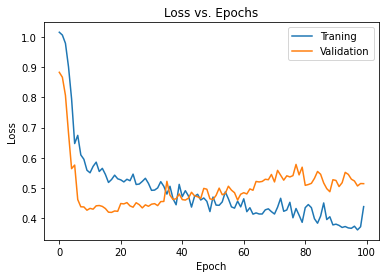

In [18]:
plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Traning', 'Validation'])

**The model is still overfitted the training data but it is improved compared to the one in Model evaluation.**